# RNA Clasificacion

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer

## Obtención de los datos

In [2]:
# 1. Cargar los datos
df = pd.read_csv('../../train.csv')

# 2. Crear la variable de respuesta categórica basada en los terciles del precio de venta
tercil_1 = df['SalePrice'].quantile(1/3)
tercil_2 = df['SalePrice'].quantile(2/3)

# Crear la categoría de precio
df['PriceCategory'] = pd.cut(
    df['SalePrice'], 
    bins=[0, tercil_1, tercil_2, float('inf')], 
    labels=['Económica', 'Intermedia', 'Cara']
)

# 3. Seleccionar las características para el modelo
selected_features = [
    'OverallQual',    # Calidad general
    'GrLivArea',      # Área habitable
    'GarageCars',     # Capacidad del garaje
    'YearBuilt',      # Año de construcción
    'TotalBsmtSF',    # Superficie total del sótano
    'FullBath',       # Baños completos
    'Neighborhood',   # Vecindario (categórica)
    'ExterQual',      # Calidad del exterior (categórica)
    'KitchenQual',    # Calidad de la cocina (categórica)
    'BsmtQual'        # Calidad del sótano (categórica)
]

# 4. Preparar los datos
X = df[selected_features].copy()
y = df['PriceCategory']

### Transformación

In [3]:
# Manejar valores faltantes en características numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_features] = imputer.fit_transform(X[numeric_features])

# Manejar valores faltantes en características categóricas
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].fillna('None')

# Objetos de preprocesamiento para pipeline de modelos
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Generación de Modelos

In [4]:
# Generación de preprocesador
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico, categorical_features),
    ('standard_scaler',preprocesador_numerico, numeric_features)
])

In [5]:
# Modelo 1: función de activación tanh y topología (5, 3)
modelo_1 = make_pipeline(preprocesador,MLPClassifier(activation="tanh", hidden_layer_sizes=(5,3)))

start = time.time()
modelo_1.fit(X_train, y_train)
pred1 = modelo_1.predict(X_test)
tiempo_1 = time.time() - start

c:\Users\Fabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
cm_1 = confusion_matrix(y_test,pred1)
accuracy_1 =accuracy_score(y_test,pred1)
precision_1 = precision_score(y_test,pred1,average='micro')
recall_1 = recall_score(y_test,pred1,average='micro')
f1_1 = f1_score(y_test,pred1,average='micro')
classificationReport_1 = classification_report(y_test,pred1)

print("Matriz de confusión:\n", cm_1)
print('\nAccuracy: ',accuracy_1)
print('Precision: ', precision_1)
print('recall: ',recall_1)
print('tiempo de procesamiento: ',tiempo_1)
print("\nClassification Report:\n", classificationReport_1)

Matriz de confusión:
 [[134   0  11]
 [  4 115  27]
 [ 21  27  99]]

Accuracy:  0.7945205479452054
Precision:  0.7945205479452054
recall:  0.7945205479452054
tiempo de procesamiento:  0.8697237968444824

Classification Report:
               precision    recall  f1-score   support

        Cara       0.84      0.92      0.88       145
   Económica       0.81      0.79      0.80       146
  Intermedia       0.72      0.67      0.70       147

    accuracy                           0.79       438
   macro avg       0.79      0.80      0.79       438
weighted avg       0.79      0.79      0.79       438



In [7]:
# Modelo 2: función de activación relu y topología (10,)
modelo_2 = make_pipeline(preprocesador, MLPClassifier(activation="relu", hidden_layer_sizes=(10,)))

start = time.time()
modelo_2.fit(X_train, y_train)
pred2 = modelo_2.predict(X_test)
tiempo_2 = time.time() - start

c:\Users\Fabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
cm_2 = confusion_matrix(y_test,pred2)
accuracy_2 =accuracy_score(y_test,pred2)
precision_2 = precision_score(y_test,pred2,average='micro')
recall_2 = recall_score(y_test,pred2,average='micro')
f1_2 = f1_score(y_test,pred2,average='micro')
classificationReport_2 = classification_report(y_test,pred2)

print("Matriz de confusión:\n", cm_2)
print('\nAccuracy: ',accuracy_2)
print('Precision: ', precision_2)
print('recall: ',recall_2)
print('tiempo de procesamiento: ',tiempo_2)
print("\nClassification Report:\n", classificationReport_2)

Matriz de confusión:
 [[133   0  12]
 [  1 117  28]
 [ 19  30  98]]

Accuracy:  0.7945205479452054
Precision:  0.7945205479452054
recall:  0.7945205479452054
tiempo de procesamiento:  0.8244204521179199

Classification Report:
               precision    recall  f1-score   support

        Cara       0.87      0.92      0.89       145
   Económica       0.80      0.80      0.80       146
  Intermedia       0.71      0.67      0.69       147

    accuracy                           0.79       438
   macro avg       0.79      0.80      0.79       438
weighted avg       0.79      0.79      0.79       438



### Comparación de modelos

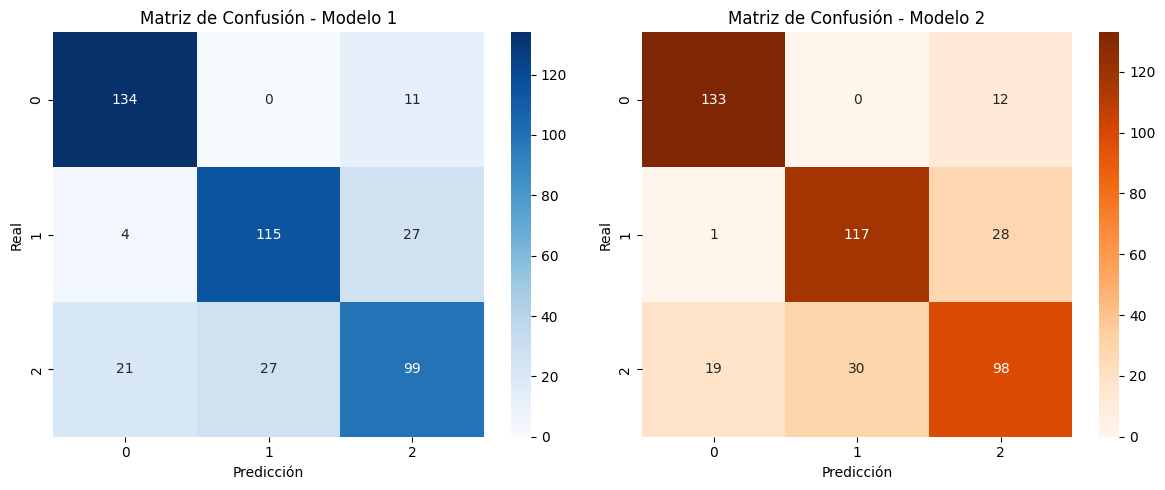

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de Confusión - Modelo 1")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(cm_2, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Matriz de Confusión - Modelo 2")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

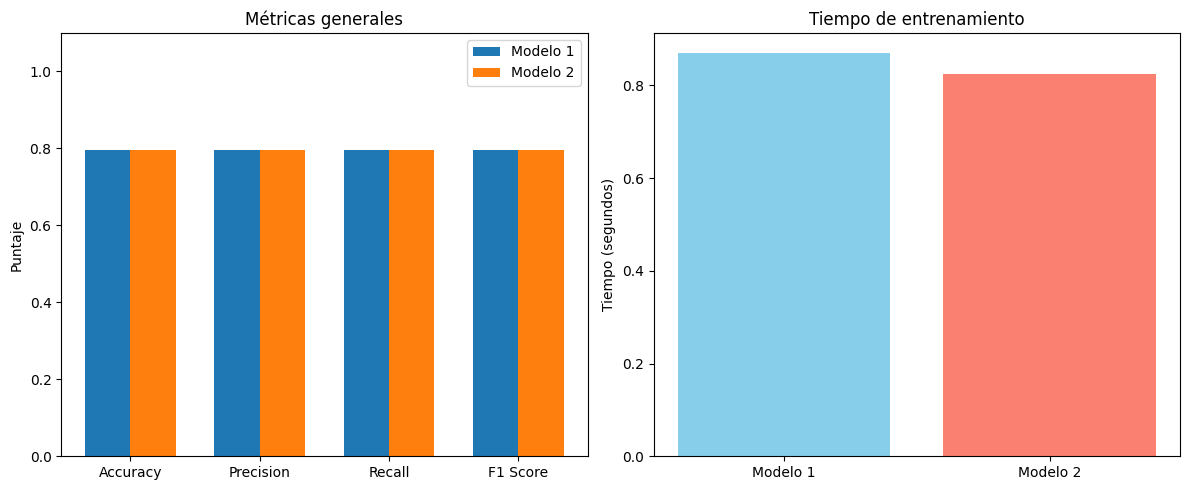

In [10]:
# Supón que ya calculaste estas métricas:
metrics_model1 = [accuracy_1, precision_1, recall_1, f1_1]
metrics_model2 = [accuracy_2, precision_2, recall_2, f1_2]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

tiempos = [tiempo_1, tiempo_2]
modelos = ['Modelo 1', 'Modelo 2']

x = np.arange(len(labels))
width = 0.35

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de métricas generales
axes[0].bar(x - width/2, metrics_model1, width, label='Modelo 1')
axes[0].bar(x + width/2, metrics_model2, width, label='Modelo 2')
axes[0].set_ylabel('Puntaje')
axes[0].set_title('Métricas generales')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].set_ylim(0, 1.1)
axes[0].legend()

# Gráfico de tiempos de entrenamiento
axes[1].bar(modelos, tiempos, color=['skyblue', 'salmon'])
axes[1].set_ylabel('Tiempo (segundos)')
axes[1].set_title('Tiempo de entrenamiento')

plt.tight_layout()
plt.show()


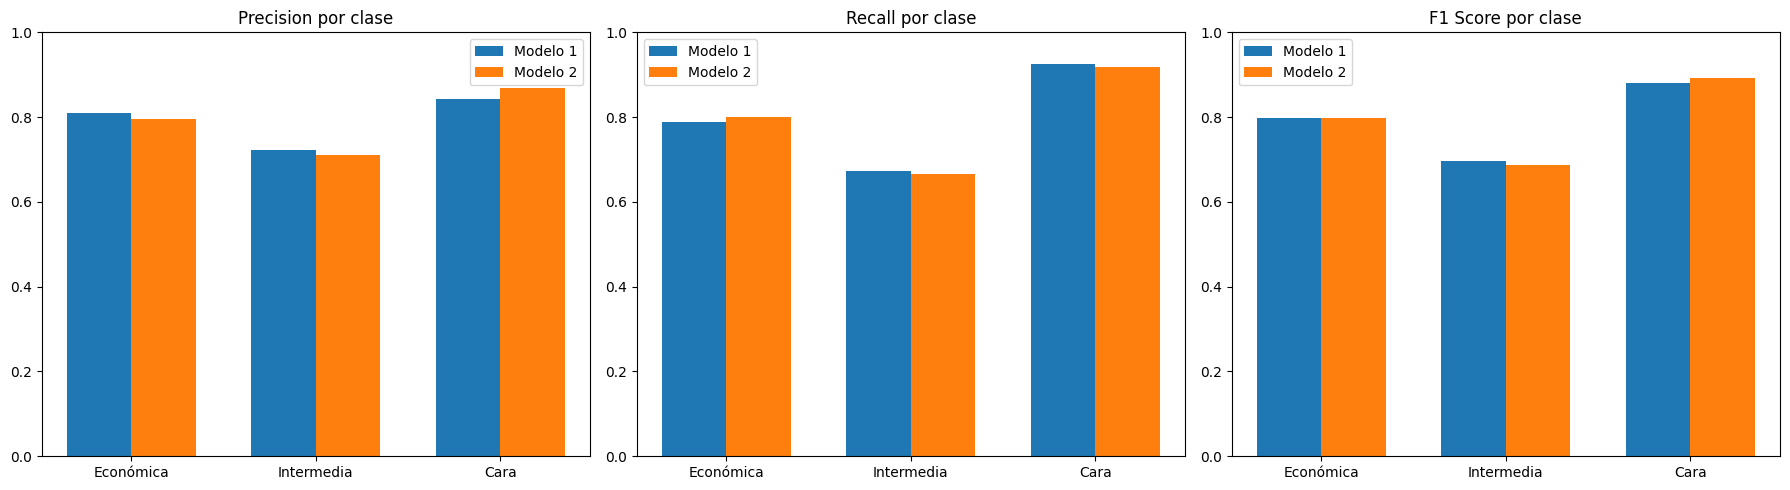

In [11]:
# Generar reports como diccionarios
report1 = classification_report(y_test, pred1, output_dict=True)
report2 = classification_report(y_test, pred2, output_dict=True)

# Obtener nombres de clases (asumiendo etiquetas como 'barata', 'media', 'cara')
clases =['Económica', 'Intermedia', 'Cara']

# Extraer métricas por clase
precision1 = [report1[cl]['precision'] for cl in clases]
recall1 = [report1[cl]['recall'] for cl in clases]
f1_1 = [report1[cl]['f1-score'] for cl in clases]

precision2 = [report2[cl]['precision'] for cl in clases]
recall2 = [report2[cl]['recall'] for cl in clases]
f1_2 = [report2[cl]['f1-score'] for cl in clases]

x = np.arange(len(clases))
width = 0.35

# Crear figura
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Precision
axes[0].bar(x - width/2, precision1, width, label='Modelo 1')
axes[0].bar(x + width/2, precision2, width, label='Modelo 2')
axes[0].set_title('Precision por clase')
axes[0].set_xticks(x)
axes[0].set_xticklabels(clases)
axes[0].set_ylim(0, 1)
axes[0].legend()

# Recall
axes[1].bar(x - width/2, recall1, width, label='Modelo 1')
axes[1].bar(x + width/2, recall2, width, label='Modelo 2')
axes[1].set_title('Recall por clase')
axes[1].set_xticks(x)
axes[1].set_xticklabels(clases)
axes[1].set_ylim(0, 1)
axes[1].legend()

# F1 Score
axes[2].bar(x - width/2, f1_1, width, label='Modelo 1')
axes[2].bar(x + width/2, f1_2, width, label='Modelo 2')
axes[2].set_title('F1 Score por clase')
axes[2].set_xticks(x)
axes[2].set_xticklabels(clases)
axes[2].set_ylim(0, 1)
axes[2].legend()

plt.tight_layout()
plt.show()

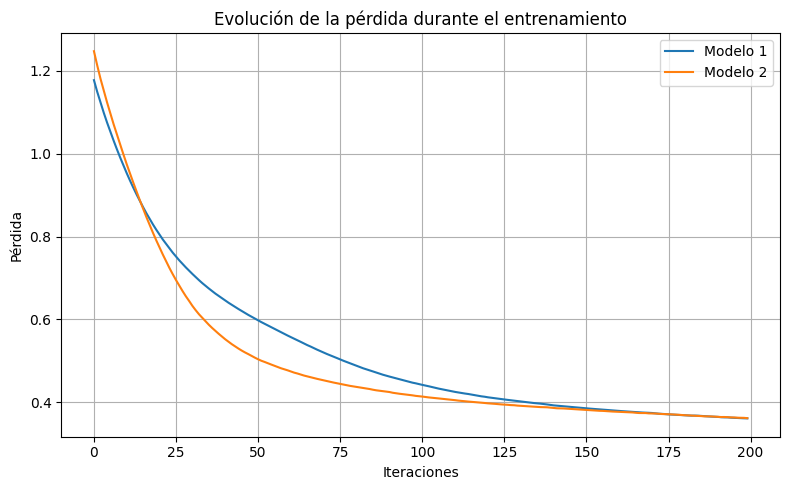

In [12]:
# Accedemos al MLPClassifier desde los pipelines
mlp_1 = modelo_1.named_steps['mlpclassifier']
mlp_2 = modelo_2.named_steps['mlpclassifier']

# Graficamos ambas curvas
plt.figure(figsize=(8,5))
plt.plot(mlp_1.loss_curve_, label='Modelo 1')
plt.plot(mlp_2.loss_curve_, label='Modelo 2')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ¿Hay sobreajuste?

In [13]:
# Predicciones en entrenamiento
train_pred1 = modelo_1.predict(X_train)
train_pred2 = modelo_2.predict(X_train)

# Accuracy
acc_train1 = accuracy_score(y_train, train_pred1)

acc_train2 = accuracy_score(y_train, train_pred2)

print(f"Modelo 1 - Accuracy train: {acc_train1:.2f}, test: {accuracy_1:.2f}")
print(f"Modelo 2 - Accuracy train: {acc_train2:.2f}, test: {accuracy_2:.2f}")

Modelo 1 - Accuracy train: 0.88, test: 0.79
Modelo 2 - Accuracy train: 0.86, test: 0.79


Según los resultados anteriores y viendo la gráfica de la pérdida (loss_curve_)
Ambas curvas descienden suavemente sin signos de sobreajuste evidente (como una pérdida muy baja con test score muy malo).
Las diferencias entre entrenamiento y test están dentro de un rango razonable (menos de 10%).

Entonces, podemos decir que no hay evidencia clara de overfitting fuerte. Ambos modelos generalizan decentemente, aunque pueden ser optimizados.

## Tuneo de parámetros
Para el mejor de los dos modelos

In [14]:
parametros_tun = {
    'mlpclassifier__solver': ['adam', 'lbfgs'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__hidden_layer_sizes': [(2,2), (5,3), (10,), (6,4)],
    'mlpclassifier__learning_rate_init': [0.001, 0.01, 0.003],
    'mlpclassifier__early_stopping': [True]
}

model_grid_search = GridSearchCV(modelo_2, 
                                 param_grid=parametros_tun,
                                 scoring='f1_micro', 
                                 n_jobs=2, 
                                 cv=10)

model_grid_search.fit(X_train, y_train)
pred = model_grid_search.predict(X_test)
model_grid_search.best_params_


c:\Users\Fabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Fabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Fabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Fabi\AppData

{'mlpclassifier__alpha': 0.01,
 'mlpclassifier__early_stopping': True,
 'mlpclassifier__hidden_layer_sizes': (2, 2),
 'mlpclassifier__learning_rate_init': 0.01,
 'mlpclassifier__solver': 'lbfgs'}

In [15]:
cm = confusion_matrix(y_test,pred)
accuracy=accuracy_score(y_test,pred)
precision = precision_score(y_test,pred,average='micro')
recall =  recall_score(y_test,pred,average='micro')
f1 = f1_score(y_test,pred,average='micro')

print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Accuracy:  0.7922374429223744
Precision:  0.7922374429223744
recall:  0.7922374429223744


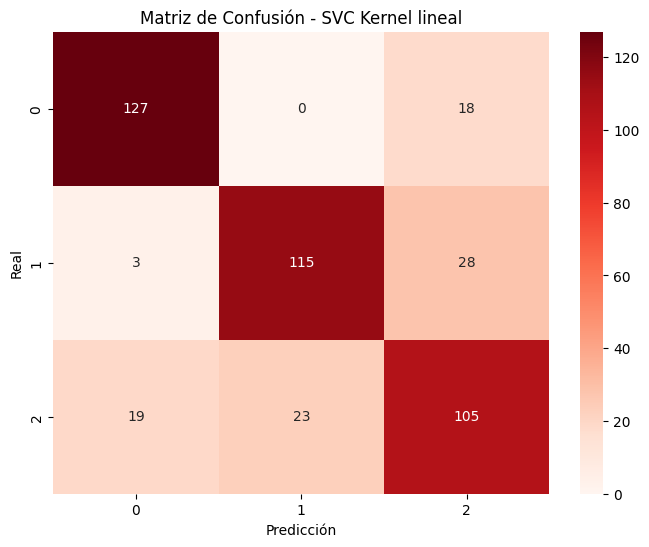

In [18]:
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVC Kernel lineal")
plt.show()